In [8]:
import pandas as pd 
import re
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [9]:
df = pd.read_csv('C:/Users/ERC/Desktop/Thesis/genomes-all_metadata_fish.csv')
sampled_df = df.sample(n=500, random_state = 10, replace = True)

In [10]:
df_human = pd.read_csv('C:/Users/ERC/Desktop/Thesis/genomes-all_metadata.human.csv')
sampled_df2 = df_human.sample(n=500, random_state = 42, replace = True) #sampling with replacement
sampled = sampled_df2.iloc[:, [5, 14, 20]] #Select this columns
print(sampled)
nums = sampled.isnull().sum()
print(nums)

        GC_content                                            Lineage Species
121958       57.39  d__Bacteria;p__Proteobacteria;c__Gammaproteoba...   Human
146867       29.78  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...   Human
131932       49.10  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   Human
259178       55.09  d__Bacteria;p__Proteobacteria;c__Gammaproteoba...   Human
119879       48.28  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   Human
...            ...                                                ...     ...
21689        48.53  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   Human
273318       44.12  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   Human
9348         60.02  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...   Human
38102        57.60  d__Bacteria;p__Actinobacteriota;c__Coriobacter...   Human
74460        61.38  d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...   Human

[500 rows x 3 columns]
GC_content    0
Lineage       0
Species 

In [11]:
df_pig = pd.read_csv('C:/Users/ERC/Desktop/Thesis/genomes-all_metadata pig.csv')
sampled_df3 = df_pig.sample(n=500, random_state = 42, replace = True)
pig_data = sampled_df3.iloc[:, [5,14,20]]
print(pig_data)

      GC_content                                            Lineage Species
3174       49.67  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...     Pig
3507       47.01  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig
860        48.49  d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...     Pig
1294       48.24  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig
1130       43.79  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig
...          ...                                                ...     ...
1758       27.21  d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...     Pig
2613       60.03  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...     Pig
569        48.30  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig
1346       55.83  d__Bacteria;p__Firmicutes_C;c__Negativicutes;o...     Pig
1895       41.80  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig

[500 rows x 3 columns]


In [12]:
df_mouse = pd.read_csv('C:/Users/ERC/Desktop/Thesis/genomes-all_metadata mouse.csv')
sampled_df4 = df_mouse.sample(n=500, random_state = 42, replace = True)
mouse_df = sampled_df4.iloc[:,[5,14,20]]
print(mouse_df)

        GC_content                                            Lineage Species
15795        26.54  d__Bacteria;p__Bacillota_A;c__Clostridia;o__TA...   Mouse
860          44.76  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Ch...   Mouse
103694       47.57  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...   Mouse
110268       47.54  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...   Mouse
76820        49.89  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   Mouse
...            ...                                                ...     ...
68027        51.61  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...   Mouse
92772        46.19  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...   Mouse
80135        35.21  d__Bacteria;p__Bacillota;c__Bacilli;o__Acholep...   Mouse
19508        54.02  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   Mouse
3051         58.45  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Os...   Mouse

[500 rows x 3 columns]


In [13]:
df_chicken = pd.read_csv('C:/Users/ERC/Desktop/Thesis/genomes-all_metadata chicken.csv')
sampled_df5 = df_chicken.sample(n=500, random_state = 42, replace = True)
chicken_df = sampled_df5.iloc[:,[5,14,20]]
print(chicken_df)

       GC_content                                            Lineage  Species
7270        36.92  d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...  Chicken
860         47.91  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...  Chicken
5390        34.09  d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...  Chicken
5191        41.73  d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...  Chicken
11964       40.27  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...  Chicken
...           ...                                                ...      ...
3124        55.61  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...  Chicken
5691        49.38  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...  Chicken
3051        45.83  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...  Chicken
4           59.44  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...  Chicken
5222        53.82  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...  Chicken

[500 rows x 3 columns]


In [14]:
df_honeybee = pd.read_csv('C:/Users/ERC/Desktop/Thesis/genomes-all_metadata honeybee.csv')
sampled_df6 = df_honeybee.sample(n=500, random_state = 42, replace = True)
honeybee_df = sampled_df6.iloc[:,[5,14,20]]
print(honeybee_df)
#domain

     GC_content                                            Lineage   Species
102       55.38  d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...  Honeybee
435       33.66  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee
270       50.70  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee
106       35.54  d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...  Honeybee
71        33.41  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee
..          ...                                                ...       ...
222       60.57  d__Bacteria;p__Actinomycetota;c__Actinomycetia...  Honeybee
132       45.43  d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...  Honeybee
162       33.73  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee
214       36.82  d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...  Honeybee
234       33.77  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee

[500 rows x 3 columns]


In [15]:
def extract_taxonomy(lineage):
    if pd.isna(lineage):
        return pd.Series([None, None, None, None])  # Handle missing lineage

    # Define regex patterns for each taxonomy level
    phylum = re.search(r'p__([^;]+)', lineage)
    class_ = re.search(r'c__([^;]+)', lineage)
    order = re.search(r'o__([^;]+)', lineage)
    family = re.search(r'f__([^;]+)', lineage)
    
    # Return the matched taxonomy levels, or None if not found
    return pd.Series([
        phylum.group(1) if phylum else None,
        class_.group(1) if class_ else None,
        order.group(1) if order else None,
        family.group(1) if family else None
    ])

# Apply the extract_taxonomy function to the Lineage column
taxonomy_df = sampled['Lineage'].apply(extract_taxonomy)

# Assign appropriate column names
taxonomy_df.columns = ['Phylum', 'Class', 'Order', 'Family']

# Combine the extracted taxonomy data with the original DataFrame
sampled = pd.concat([sampled, taxonomy_df], axis=1)

# Check the result
print(sampled)

        GC_content                                            Lineage Species  \
121958       57.39  d__Bacteria;p__Proteobacteria;c__Gammaproteoba...   Human   
146867       29.78  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...   Human   
131932       49.10  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   Human   
259178       55.09  d__Bacteria;p__Proteobacteria;c__Gammaproteoba...   Human   
119879       48.28  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   Human   
...            ...                                                ...     ...   
21689        48.53  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   Human   
273318       44.12  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   Human   
9348         60.02  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...   Human   
38102        57.60  d__Bacteria;p__Actinobacteriota;c__Coriobacter...   Human   
74460        61.38  d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...   Human   

                  Phylum   

In [16]:
nums = sampled.isnull().sum()
print(nums)

GC_content    0
Lineage       0
Species       0
Phylum        0
Class         0
Order         0
Family        0
dtype: int64


In [17]:
def extract_taxonomy(lineage):
    if pd.isna(lineage):
        return pd.Series([None, None, None, None])  # Handle missing lineage

    # Define regex patterns for each taxonomy level
    phylum = re.search(r'p__([^;]+)', lineage)
    class_ = re.search(r'c__([^;]+)', lineage)
    order = re.search(r'o__([^;]+)', lineage)
    family = re.search(r'f__([^;]+)', lineage)
    
    # Return the matched taxonomy levels, or None if not found
    return pd.Series([
        phylum.group(1) if phylum else None,
        class_.group(1) if class_ else None,
        order.group(1) if order else None,
        family.group(1) if family else None
    ])

# Apply the extract_taxonomy function to the Lineage column
taxonomy_df = honeybee_df['Lineage'].apply(extract_taxonomy)

# Assign appropriate column names
taxonomy_df.columns = ['Phylum', 'Class', 'Order', 'Family']

# Combine the extracted taxonomy data with the original DataFrame
honeybee_df = pd.concat([honeybee_df, taxonomy_df], axis=1)

# Check the result
print(honeybee_df)

     GC_content                                            Lineage   Species  \
102       55.38  d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...  Honeybee   
435       33.66  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee   
270       50.70  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee   
106       35.54  d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...  Honeybee   
71        33.41  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee   
..          ...                                                ...       ...   
222       60.57  d__Bacteria;p__Actinomycetota;c__Actinomycetia...  Honeybee   
132       45.43  d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...  Honeybee   
162       33.73  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee   
214       36.82  d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...  Honeybee   
234       33.77  d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...  Honeybee   

             Phylum                Clas

In [18]:
nums = honeybee_df.isnull().sum()
print(nums)

GC_content    0
Lineage       0
Species       0
Phylum        0
Class         0
Order         0
Family        0
dtype: int64


In [19]:
def extract_taxonomy(lineage):
    if pd.isna(lineage):
        return pd.Series([None, None, None, None])  # Handle missing lineage

    # Define regex patterns for each taxonomy level
    phylum = re.search(r'p__([^;]+)', lineage)
    class_ = re.search(r'c__([^;]+)', lineage)
    order = re.search(r'o__([^;]+)', lineage)
    family = re.search(r'f__([^;]+)', lineage)
    
    # Return the matched taxonomy levels, or None if not found
    return pd.Series([
        phylum.group(1) if phylum else None,
        class_.group(1) if class_ else None,
        order.group(1) if order else None,
        family.group(1) if family else None
    ])

# Apply the extract_taxonomy function to the Lineage column
taxonomy_df = pig_data['Lineage'].apply(extract_taxonomy)

# Assign appropriate column names
taxonomy_df.columns = ['Phylum', 'Class', 'Order', 'Family']

# Combine the extracted taxonomy data with the original DataFrame
pig_data = pd.concat([pig_data, taxonomy_df], axis=1)

# Check the result
print(pig_data)

      GC_content                                            Lineage Species  \
3174       49.67  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...     Pig   
3507       47.01  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig   
860        48.49  d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...     Pig   
1294       48.24  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig   
1130       43.79  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig   
...          ...                                                ...     ...   
1758       27.21  d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...     Pig   
2613       60.03  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...     Pig   
569        48.30  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig   
1346       55.83  d__Bacteria;p__Firmicutes_C;c__Negativicutes;o...     Pig   
1895       41.80  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...     Pig   

            Phylum          Class              Orde

In [20]:
nums = pig_data.isnull().sum()
print(nums)

GC_content    0
Lineage       0
Species       0
Phylum        0
Class         0
Order         0
Family        0
dtype: int64


In [21]:

def extract_taxonomy(lineage):
    if pd.isna(lineage):
        return pd.Series([None, None, None, None])  # Handle missing lineage

    # Define regex patterns for each taxonomy level
    phylum = re.search(r'p__([^;]+)', lineage)
    class_ = re.search(r'c__([^;]+)', lineage)
    order = re.search(r'o__([^;]+)', lineage)
    family = re.search(r'f__([^;]+)', lineage)
    
    # Return the matched taxonomy levels, or None if not found
    return pd.Series([
        phylum.group(1) if phylum else None,
        class_.group(1) if class_ else None,
        order.group(1) if order else None,
        family.group(1) if family else None
    ])

# Apply the extract_taxonomy function to the Lineage column
taxonomy_df = mouse_df['Lineage'].apply(extract_taxonomy)

# Assign appropriate column names
taxonomy_df.columns = ['Phylum', 'Class', 'Order', 'Family']

# Combine the extracted taxonomy data with the original DataFrame
mouse_df = pd.concat([mouse_df, taxonomy_df], axis=1)

# Check the result
print(mouse_df)

        GC_content                                            Lineage Species  \
15795        26.54  d__Bacteria;p__Bacillota_A;c__Clostridia;o__TA...   Mouse   
860          44.76  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Ch...   Mouse   
103694       47.57  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...   Mouse   
110268       47.54  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...   Mouse   
76820        49.89  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   Mouse   
...            ...                                                ...     ...   
68027        51.61  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...   Mouse   
92772        46.19  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...   Mouse   
80135        35.21  d__Bacteria;p__Bacillota;c__Bacilli;o__Acholep...   Mouse   
19508        54.02  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   Mouse   
3051         58.45  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Os...   Mouse   

              Phylum       

In [22]:
nums = mouse_df.isnull().sum()
print(nums)

GC_content    0
Lineage       0
Species       0
Phylum        0
Class         0
Order         0
Family        0
dtype: int64


In [23]:
def extract_taxonomy(lineage):
    if pd.isna(lineage):
        return pd.Series([None, None, None, None])  # Handle missing lineage

    # Define regex patterns for each taxonomy level
    phylum = re.search(r'p__([^;]+)', lineage)
    class_ = re.search(r'c__([^;]+)', lineage)
    order = re.search(r'o__([^;]+)', lineage)
    family = re.search(r'f__([^;]+)', lineage)
    
    # Return the matched taxonomy levels, or None if not found
    return pd.Series([
        phylum.group(1) if phylum else None,
        class_.group(1) if class_ else None,
        order.group(1) if order else None,
        family.group(1) if family else None
    ])

# Apply the extract_taxonomy function to the Lineage column
taxonomy_df = chicken_df['Lineage'].apply(extract_taxonomy)

# Assign appropriate column names
taxonomy_df.columns = ['Phylum', 'Class', 'Order', 'Family']

# Combine the extracted taxonomy data with the original DataFrame
chicken_df = pd.concat([chicken_df, taxonomy_df], axis=1)

# Check the result
print(chicken_df)

       GC_content                                            Lineage  Species  \
7270        36.92  d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...  Chicken   
860         47.91  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...  Chicken   
5390        34.09  d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...  Chicken   
5191        41.73  d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...  Chicken   
11964       40.27  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...  Chicken   
...           ...                                                ...      ...   
3124        55.61  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...  Chicken   
5691        49.38  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...  Chicken   
3051        45.83  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...  Chicken   
4           59.44  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...  Chicken   
5222        53.82  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...  Chicken   

             Phylum       C

In [24]:
nums = chicken_df.isnull().sum()
print(nums)

GC_content    0
Lineage       0
Species       0
Phylum        0
Class         0
Order         0
Family        0
dtype: int64


In [25]:
final_df = pd.concat([honeybee_df[['GC_content', 'Phylum', 'Class', 'Order', 'Family', 'Species']],
                      chicken_df[['GC_content', 'Phylum', 'Class', 'Order', 'Family', 'Species']],
                      mouse_df[['GC_content', 'Phylum', 'Class', 'Order', 'Family', 'Species']],
                      sampled[['GC_content', 'Phylum', 'Class', 'Order', 'Family', 'Species']],
                        pig_data[['GC_content', 'Phylum', 'Class', 'Order', 'Family', 'Species']]], axis = 0).reset_index(drop=True)             
#print(final_df)
#display(final_df)

nums = final_df['Species'].unique()
print(nums)

['Honeybee' 'Chicken' 'Mouse' 'Human' 'Pig']


In [26]:
nums = final_df.isnull().sum()
print(nums)

GC_content    0
Phylum        0
Class         0
Order         0
Family        0
Species       0
dtype: int64


In [27]:
label_encoder = LabelEncoder()
final_df['Species_encoded'] = label_encoder.fit_transform(final_df['Species'])

# Now, let's target encode the 'Phylum' based on the encoded 'Species'
phylum_mean = final_df.groupby('Phylum')['Species_encoded'].mean()
final_df['Phylum_encoded'] = final_df['Phylum'].map(phylum_mean)

#This groups the rows of final_df by the unique phyla and calculates the mean of the Species_encoded values for each phylum across 
#all species present in the dataset.
# Similarly, target encode other categorical features

class_mean = final_df.groupby('Class')['Species_encoded'].mean()
final_df['Class_encoded'] = final_df['Class'].map(class_mean)

order_mean = final_df.groupby('Order')['Species_encoded'].mean()
final_df['Order_encoded'] = final_df['Order'].map(order_mean)

family_mean = final_df.groupby('Family')['Species_encoded'].mean()
final_df['Family_encoded'] = final_df['Family'].map(family_mean)

display(final_df)

,GC_content,Phylum,Class,Order,Family,Species,Species_encoded,Phylum_encoded,Class_encoded,Order_encoded,Family_encoded
0,55.38,Pseudomonadota,Alphaproteobacteria,Acetobacterales,Acetobacteraceae,Honeybee,1,1.101190,1.357143,1.000000,1.000000
1,33.66,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Honeybee,1,1.101190,1.235484,1.214912,1.102326
2,50.70,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Honeybee,1,1.101190,1.235484,1.214912,1.102326
3,35.54,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Honeybee,1,1.505882,1.693252,1.477612,1.443850
4,33.41,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Honeybee,1,1.101190,1.235484,1.214912,1.102326
...,...,...,...,...,...,...,...,...,...,...,...
2495,27.21,Firmicutes,Bacilli,RF39,UBA660,Pig,4,1.897436,1.693252,1.733333,1.733333
2496,60.03,Firmicutes_A,Clostridia,Oscillospirales,Butyricicoccaceae,Pig,4,1.755208,2.007439,2.176471,1.235294
2497,48.30,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,Pig,4,2.652952,2.652952,2.690476,3.049080
2498,55.83,Firmicutes_C,Negativicutes,Acidaminococcales,Acidaminococcaceae,Pig,4,2.342857,2.342857,2.000000,2.000000


In [26]:
X = final_df[['Phylum_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded', 'GC_content']]
Y = final_df['Species_encoded']
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)
'''
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
'''
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'max_features': ['sqrt'],  # Number of features to consider for the best split
    'bootstrap': [True],  # Whether to use bootstrap samples
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print(f'The best cross validation score/accuracy for RandomForest is: {grid_search.best_score_:.3f}')


Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
The best cross validation score/accuracy for RandomForest is: 0.758


In [28]:
rf1 = grid_search.best_estimator_
rf1.fit(X_train, y_train)
print('The training accuracy of random forest is: %.3f' % grid_search.score(X_train, y_train))
print('The testing accuracy of random forest is: %.3f' % grid_search.score(X_test, y_test))

The training accuracy of random forest is: 0.830
The testing accuracy of random forest is: 0.774


In [33]:
unique_species = final_df[['Species', 'Species_encoded']].drop_duplicates()
print(unique_species)

       Species  Species_encoded
0     Honeybee                1
500    Chicken                0
1000     Mouse                3
1500     Human                2
2000       Pig                4


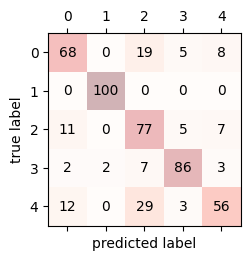

The precision score for random forest is: 0.784
Precision per class 0: 0.731
Precision per class 1: 0.980
Precision per class 2: 0.583
Precision per class 3: 0.869
Precision per class 4: 0.757


In [34]:
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print('The precision score for random forest is: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
pre_per_class = precision_score(y_true=y_test, y_pred=y_pred, average = None)
for i, precision in enumerate(pre_per_class):
    print(f"Precision per class {i}: {precision:.3f}")

# Rate of Misclassification 
    # 19 samples from class 0 were mistakenly labeled as class 2
    # Feature Overlap: Features for class 0(chicken) and class 2(human) might be too similar, causing the model to confuse them.
    # Class 4(Pig) has similarity with Human and chicken
# Rate of False Positive

In [29]:
X = final_df[['Phylum_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded', 'GC_content']]
Y = final_df['Species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'max_iter': [100, 500, 1000, 1500],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize Logistic Regression
model = LogisticRegression()

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_std, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print(f'The best cross validation score/accuracy for Logistic Regression is: {grid_search.best_score_:.3f}')

# Test Evaluation
best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(X_train_std)
y_pred = best_model.predict(X_test_std)
acc = accuracy_score(y_train, y_pred1)
accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc)
print(f"Test Accuracy: {accuracy}")


Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
The best cross validation score/accuracy for Logistic Regression is: 0.558
Training Accuracy: 0.5815
Test Accuracy: 0.578


In [33]:
X = final_df[['Phylum_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded', 'GC_content']]
Y = final_df['Species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Set up the hyperparameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1.0, 10.0, 100.0]  
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(SVC(), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_std, y_train)

# Get the best parameters
print("Best Parameters from Grid Search:", grid_search.best_params_)
print(f'The best cross validation score/accuracy for SVM is: {grid_search.best_score_:.3f}')

# Use the best estimator to predict
best_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(X_test_std)
y_pred1 = best_svm_model.predict(X_train_std)
acc = accuracy_score(y_train, y_pred1)
print("Training Accuracy:", acc)
print("Accuracy Score SVM:", accuracy_score(y_test, y_pred_best))


Best Parameters from Grid Search: {'C': 100.0, 'gamma': 10.0, 'kernel': 'rbf'}
The best cross validation score/accuracy for SVM is: 0.732
Training Accuracy: 0.8335
Accuracy Score SVM: 0.762
